<a href="https://colab.research.google.com/github/fjadidi2001/Insurance/blob/main/Insurance_MYV_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import StackingClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.utils.class_weight import compute_class_weight


In [2]:
# Step 1: Load the dataset
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Specify file path
file_path = '/content/drive/My Drive/telematics_syn.csv'

# Import pandas (assuming you want to use it to read the CSV)
import pandas as pd

# Read the CSV file
data = pd.read_csv(file_path)

# Step 2: Explore the data
print(data.head())
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Display basic statistics
print(data.describe())

Mounted at /content/drive
   Duration  Insured.age Insured.sex  Car.age  Marital  Car.use  Credit.score  \
0       366           45        Male       -1  Married  Commute         609.0   
1       182           44      Female        3  Married  Commute         575.0   
2       184           48      Female        6  Married  Commute         847.0   
3       183           71        Male        6  Married  Private         842.0   
4       183           84        Male       10  Married  Private         856.0   

  Region  Annual.miles.drive  Years.noclaims  ...  Left.turn.intensity10  \
0  Urban             6213.71              25  ...                    1.0   
1  Urban            12427.42              20  ...                   58.0   
2  Urban            12427.42              14  ...                    0.0   
3  Urban             6213.71              43  ...                    0.0   
4  Urban             6213.71              65  ...                    2.0   

   Left.turn.intensity11  Left

In [3]:
# Separate features and target
X = data.drop(['NB_Claim', 'AMT_Claim'], axis=1)
y = (data['NB_Claim'] > 0).astype(int)  # Convert to binary (0 for no claim, 1 for claim)

In [4]:
# Check class balance
class_counts = y.value_counts()
print("Class distribution:")
print(class_counts)
print(f"Class balance ratio: {class_counts[0] / class_counts[1]:.2f}")

Class distribution:
NB_Claim
0    95728
1     4272
Name: count, dtype: int64
Class balance ratio: 22.41


In [5]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Define numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = ['Insured.sex', 'Marital', 'Car.use', 'Region']

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [7]:
# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

In [11]:
# Adjust display options to show all columns
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent line wrapping
print(data.head())


   Duration  Insured.age Insured.sex  Car.age  Marital  Car.use  Credit.score Region  Annual.miles.drive  Years.noclaims  Territory  Annual.pct.driven  Total.miles.driven  Pct.drive.mon  Pct.drive.tue  Pct.drive.wed  Pct.drive.thr  Pct.drive.fri  Pct.drive.sat  Pct.drive.sun  Pct.drive.2hrs  Pct.drive.3hrs  Pct.drive.4hrs  Pct.drive.wkday  Pct.drive.wkend  Pct.drive.rush am  Pct.drive.rush pm  Avgdays.week  Accel.06miles  Accel.08miles  Accel.09miles  Accel.11miles  Accel.12miles  Accel.14miles  Brake.06miles  Brake.08miles  Brake.09miles  Brake.11miles  Brake.12miles  Brake.14miles  Left.turn.intensity08  Left.turn.intensity09  Left.turn.intensity10  Left.turn.intensity11  Left.turn.intensity12  Right.turn.intensity08  Right.turn.intensity09  Right.turn.intensity10  Right.turn.intensity11  Right.turn.intensity12  NB_Claim    AMT_Claim
0       366           45        Male       -1  Married  Commute         609.0  Urban             6213.71              25         70           0.849315  

# Get summary statistics


In [13]:
print("Summary statistics:\n", data.describe())


Summary statistics:
             Duration    Insured.age        Car.age   Credit.score  Annual.miles.drive  Years.noclaims      Territory  Annual.pct.driven  Total.miles.driven  Pct.drive.mon  Pct.drive.tue  Pct.drive.wed  Pct.drive.thr  Pct.drive.fri  Pct.drive.sat  Pct.drive.sun  Pct.drive.2hrs  Pct.drive.3hrs  Pct.drive.4hrs  Pct.drive.wkday  Pct.drive.wkend  Pct.drive.rush am  Pct.drive.rush pm   Avgdays.week  Accel.06miles  Accel.08miles  Accel.09miles  Accel.11miles  Accel.12miles  Accel.14miles  Brake.06miles  Brake.08miles  Brake.09miles  Brake.11miles  Brake.12miles  Brake.14miles  Left.turn.intensity08  Left.turn.intensity09  Left.turn.intensity10  Left.turn.intensity11  Left.turn.intensity12  Right.turn.intensity08  Right.turn.intensity09  Right.turn.intensity10  Right.turn.intensity11  Right.turn.intensity12      NB_Claim      AMT_Claim
count  100000.000000  100000.000000  100000.000000  100000.000000       100000.000000   100000.000000  100000.000000      100000.000000    

# Visualize the dataset.


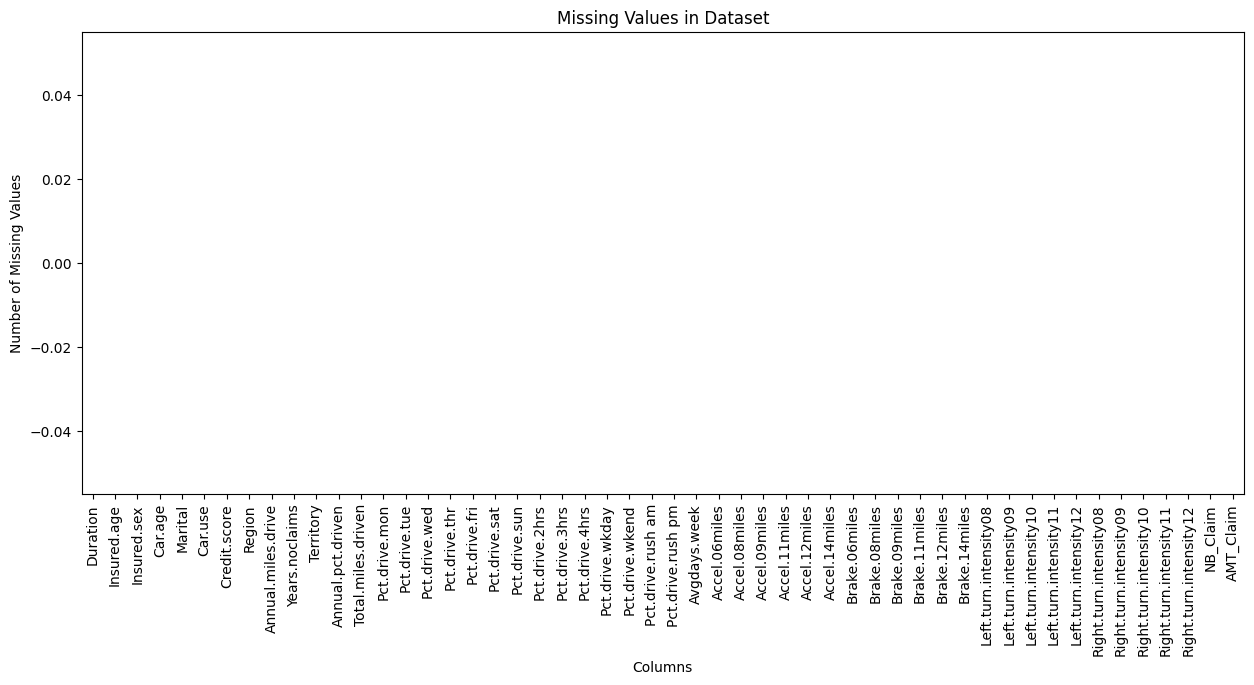

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming data is your DataFrame
missing_values = data.isnull().sum()

# Plotting the missing values
missing_values.plot(kind='bar', figsize=(15, 6))
plt.title('Missing Values in Dataset')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

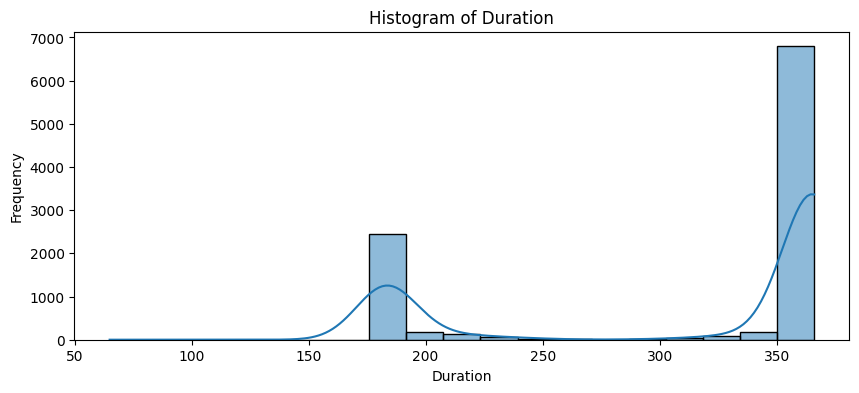

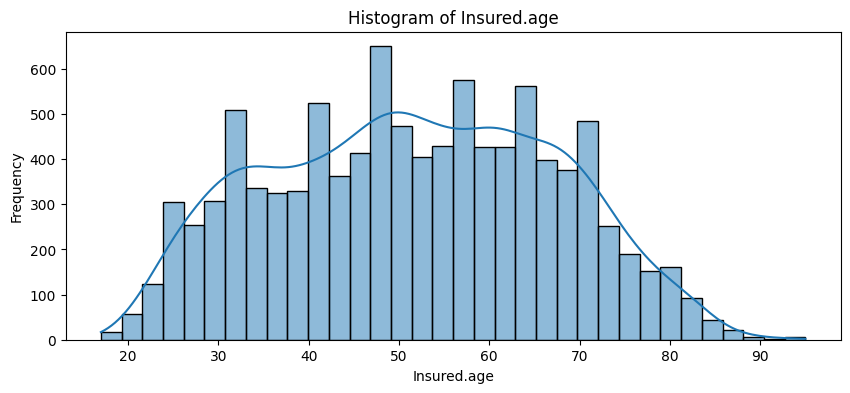

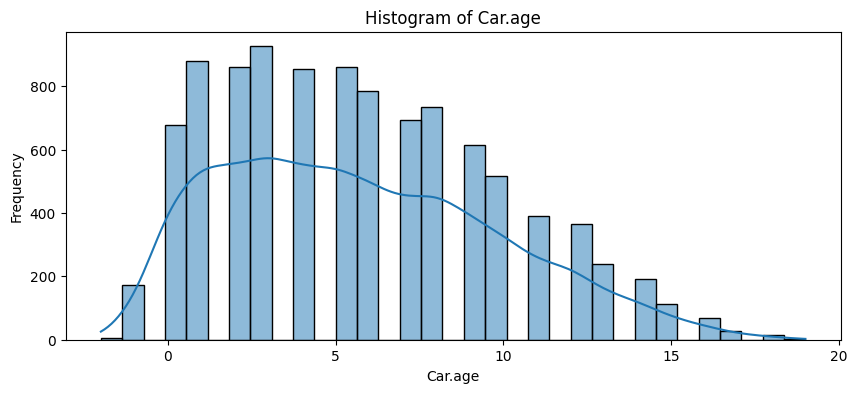

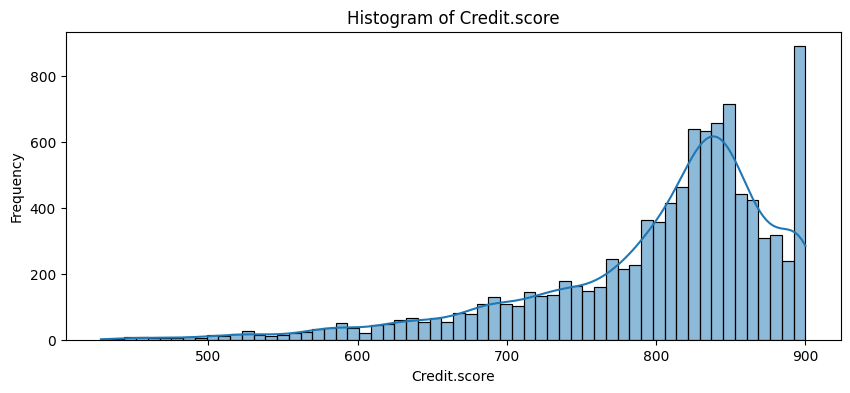

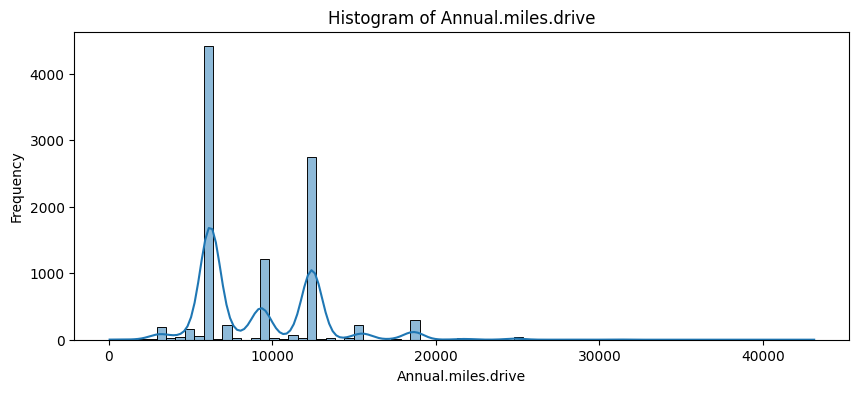

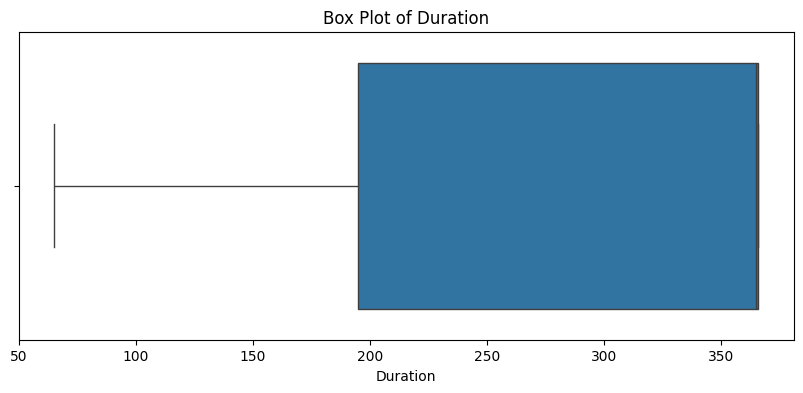

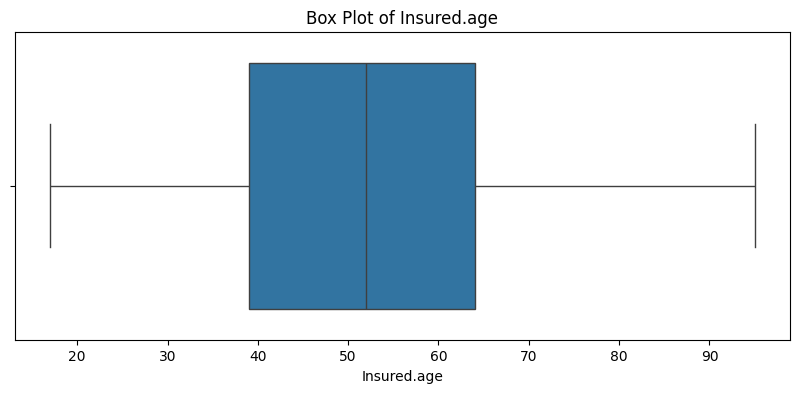

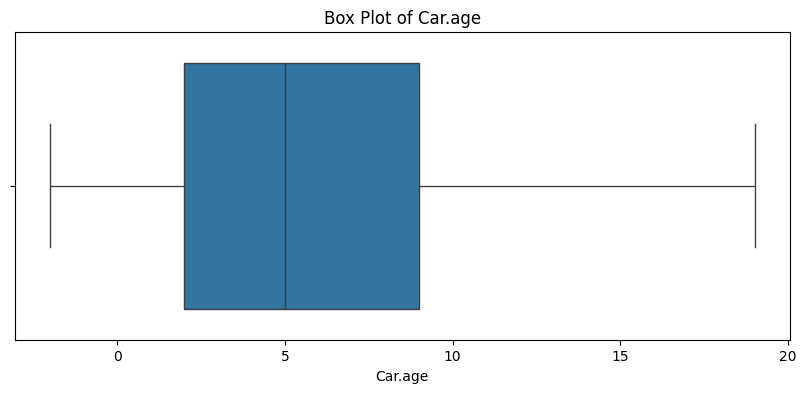

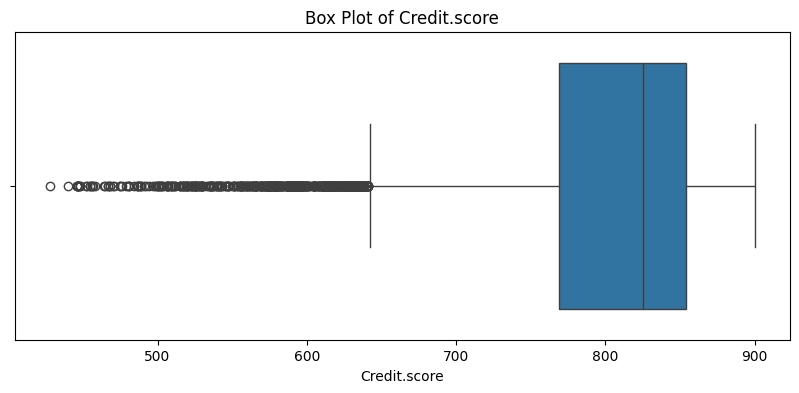

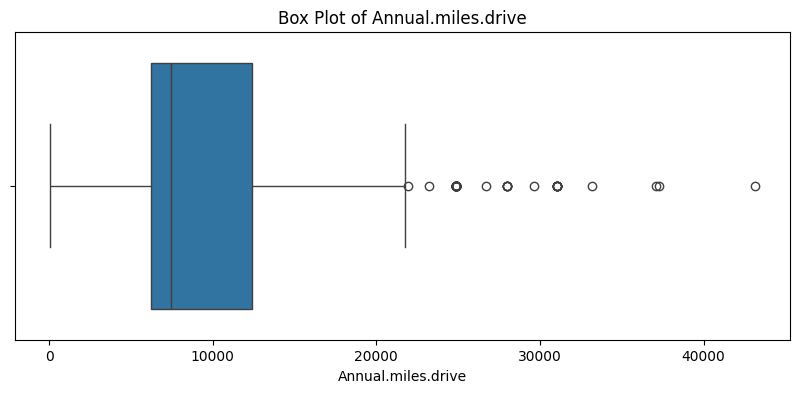

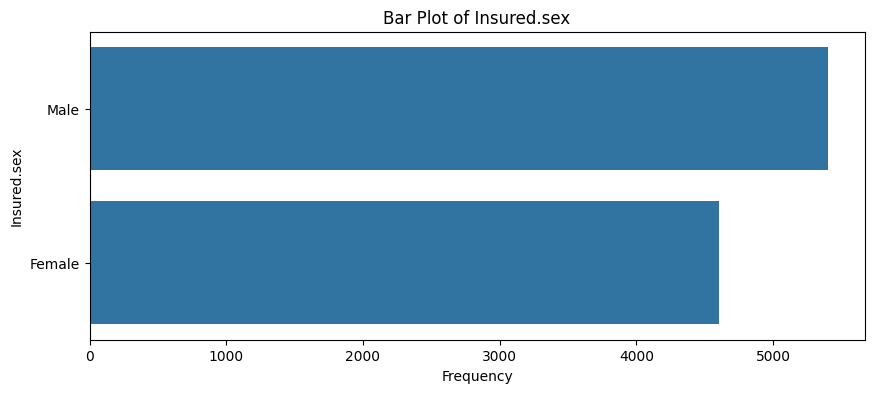

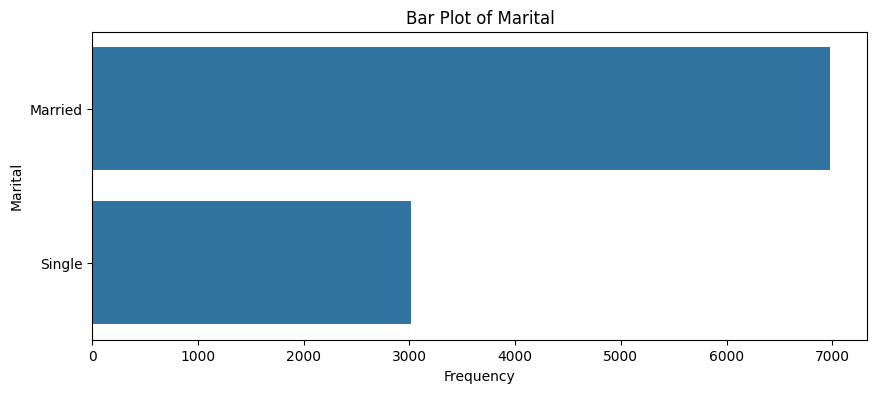

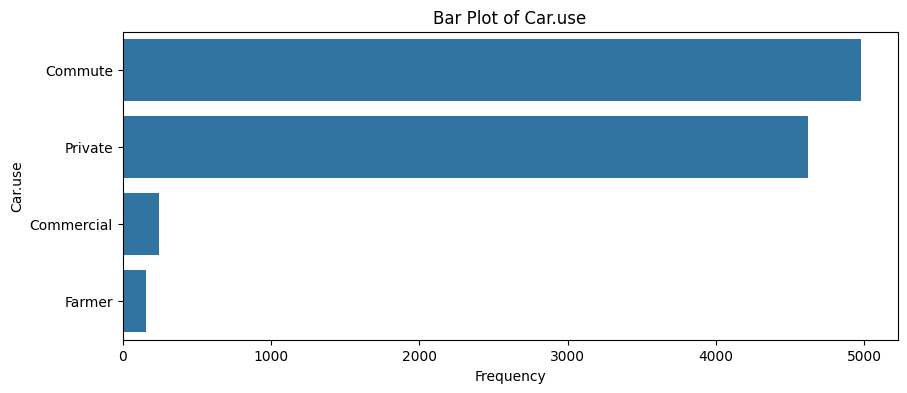

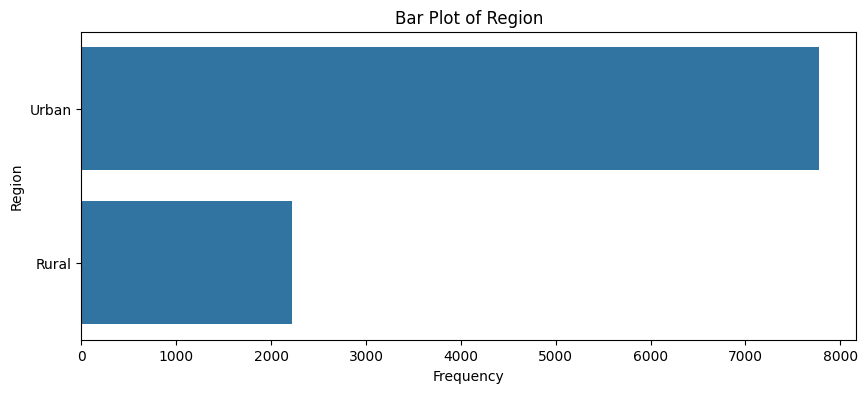

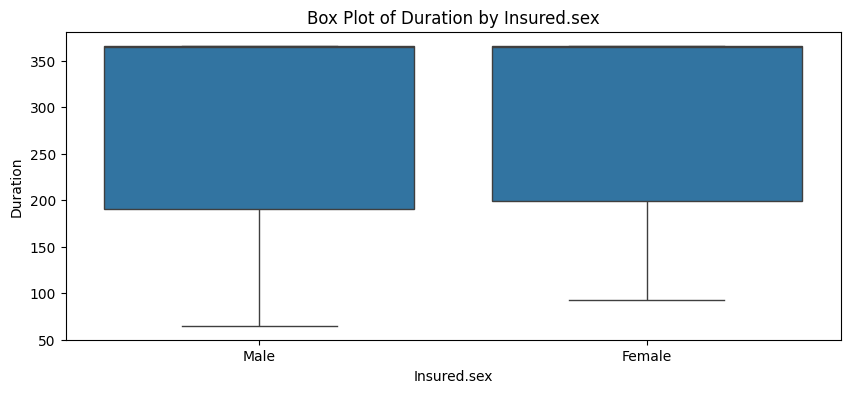

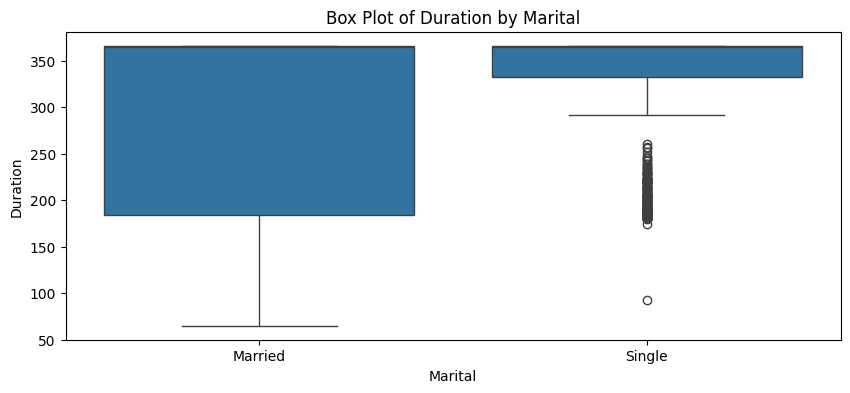

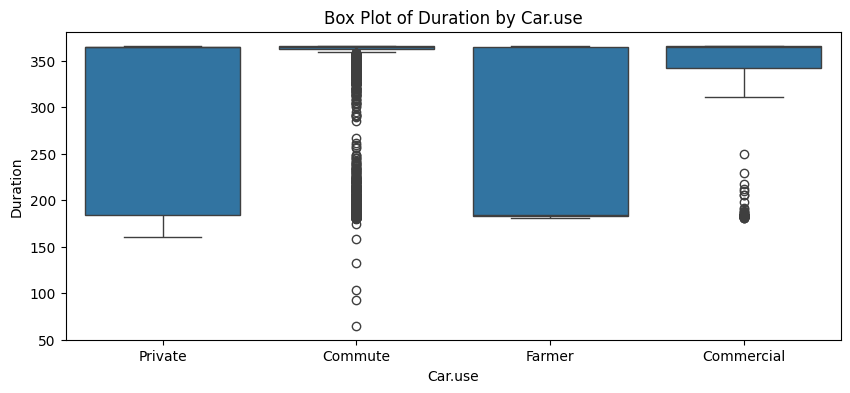

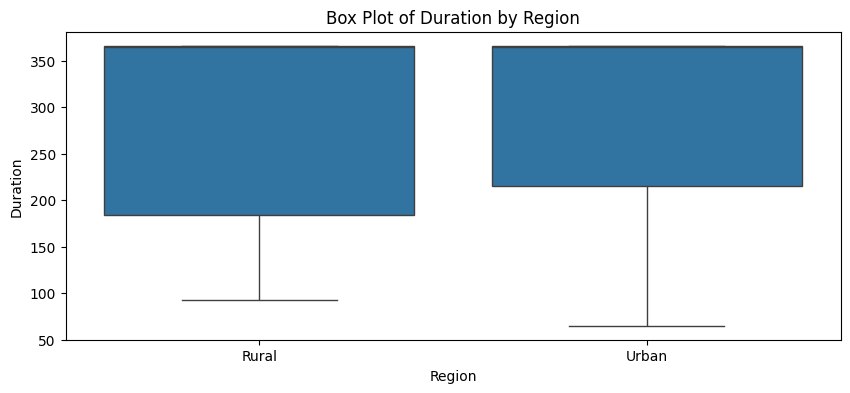

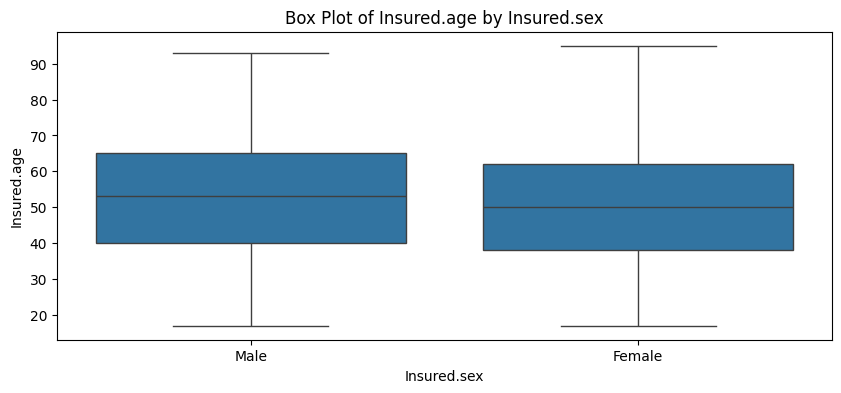

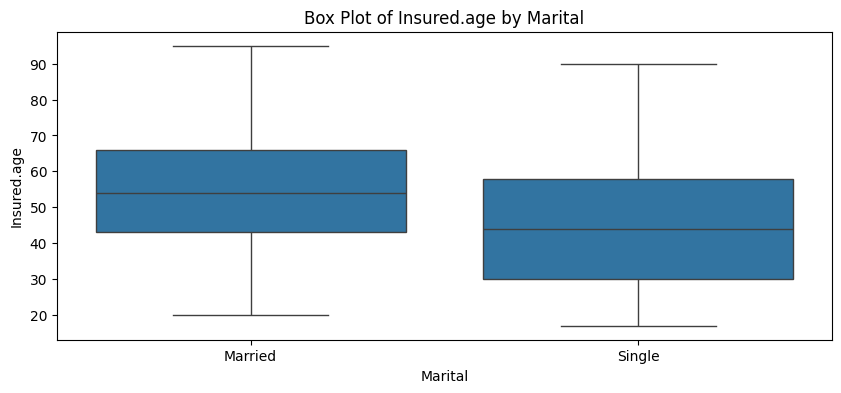

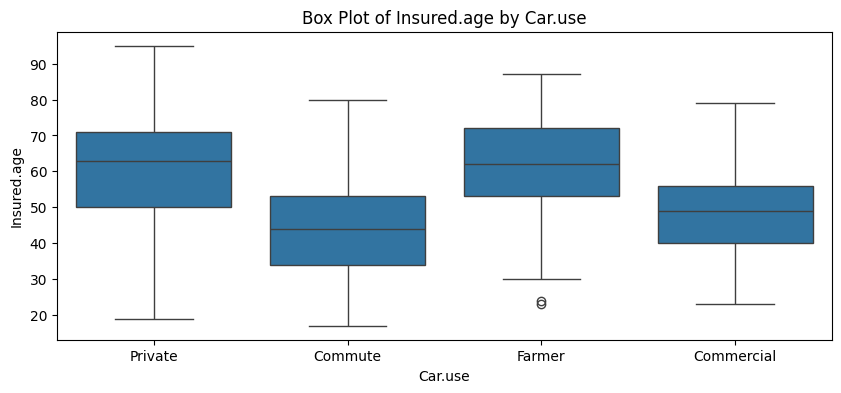

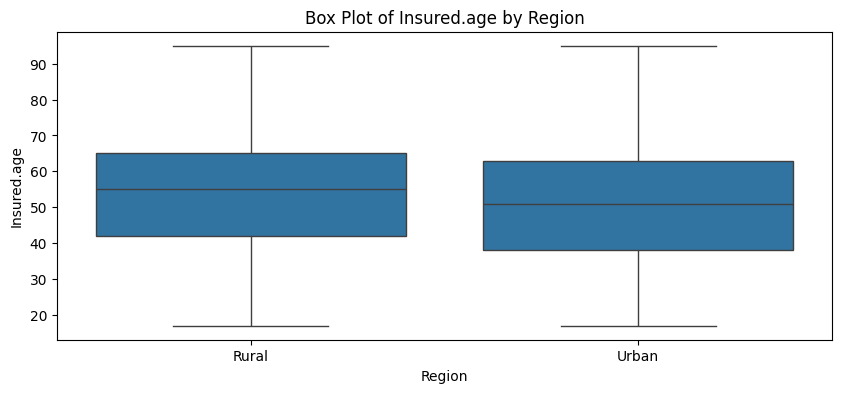

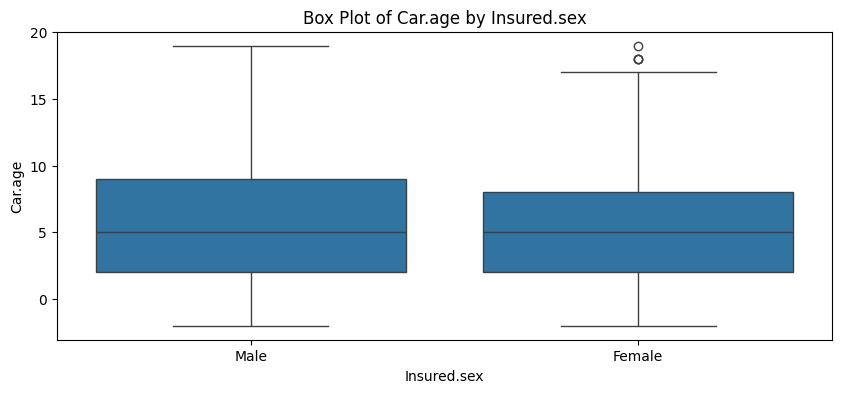

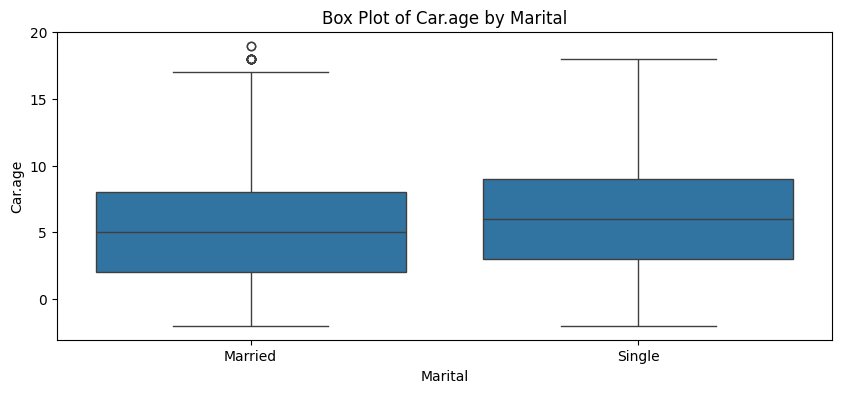

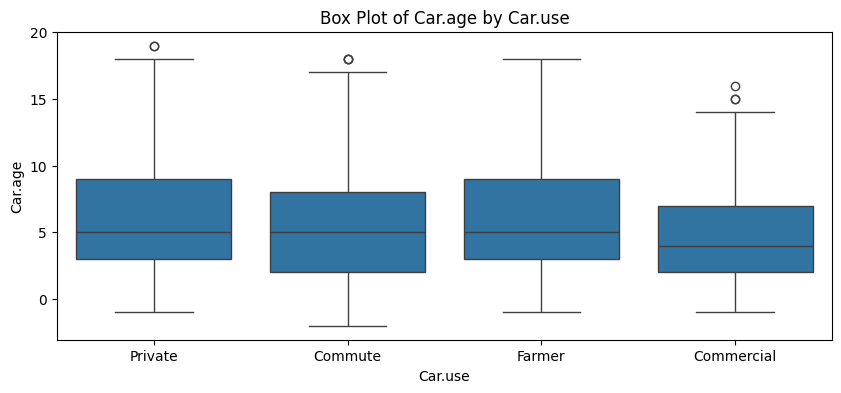

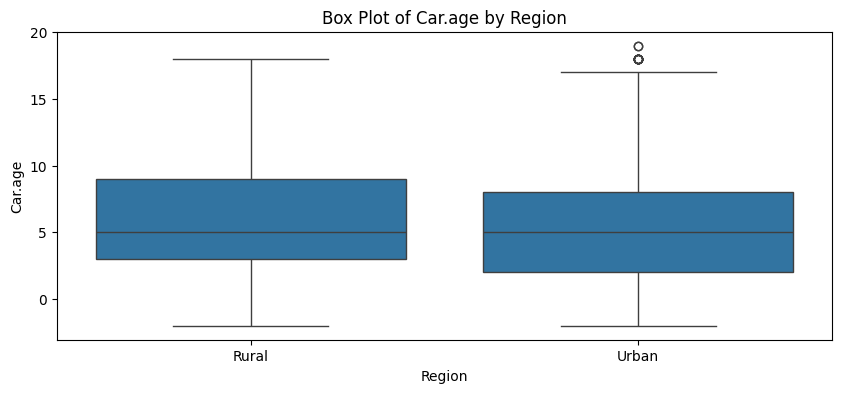

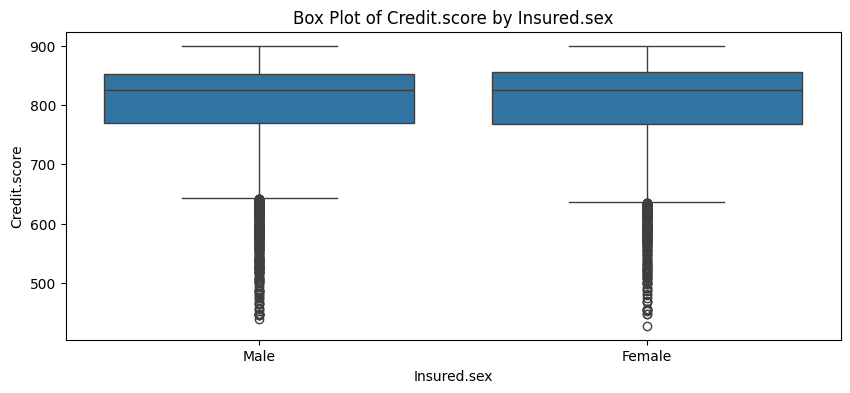

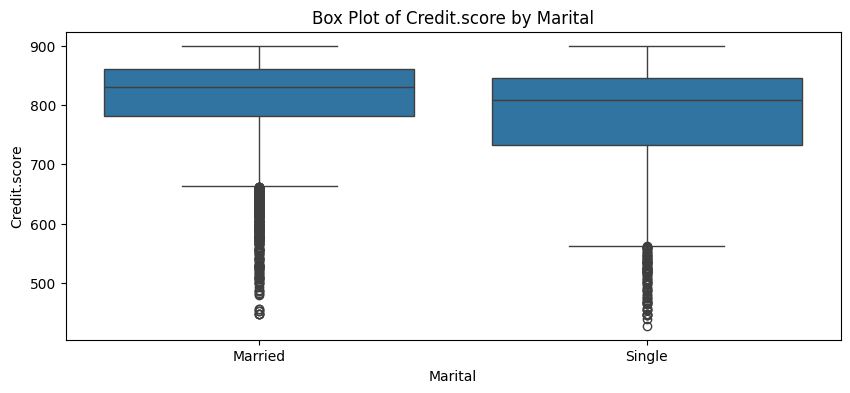

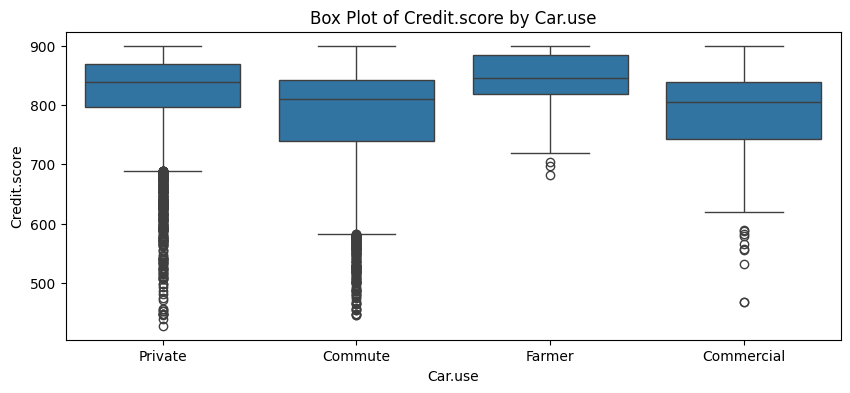

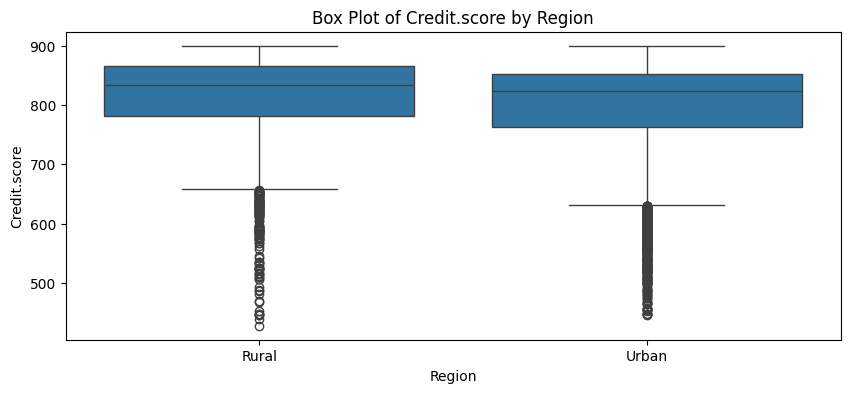

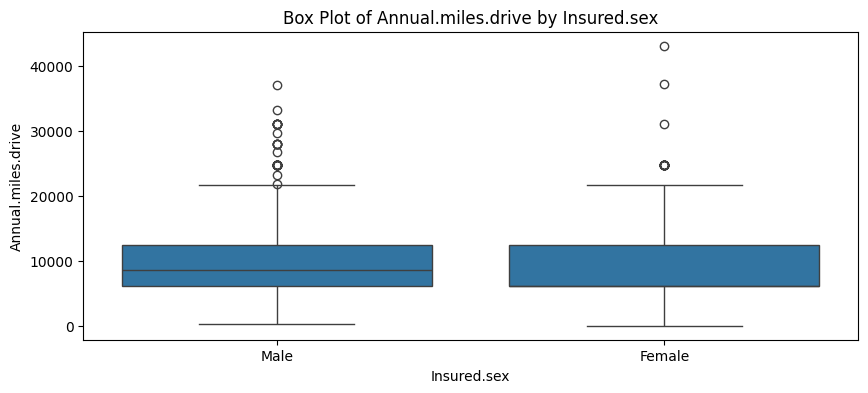

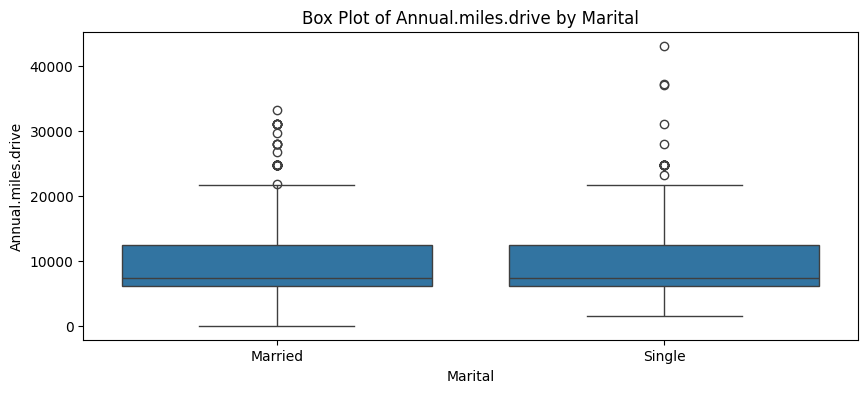

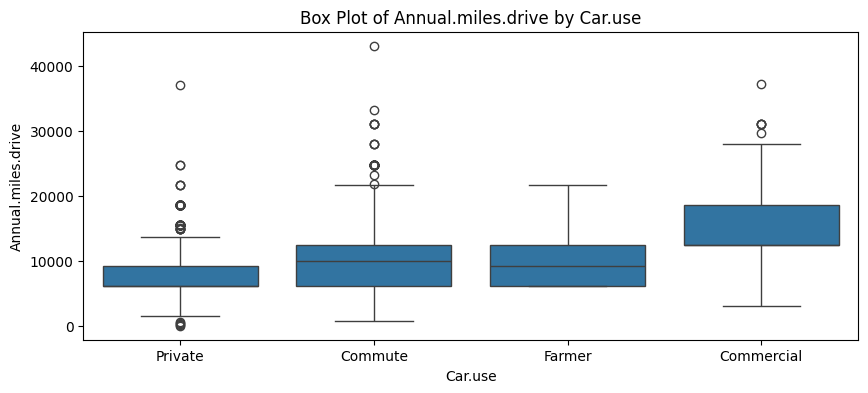

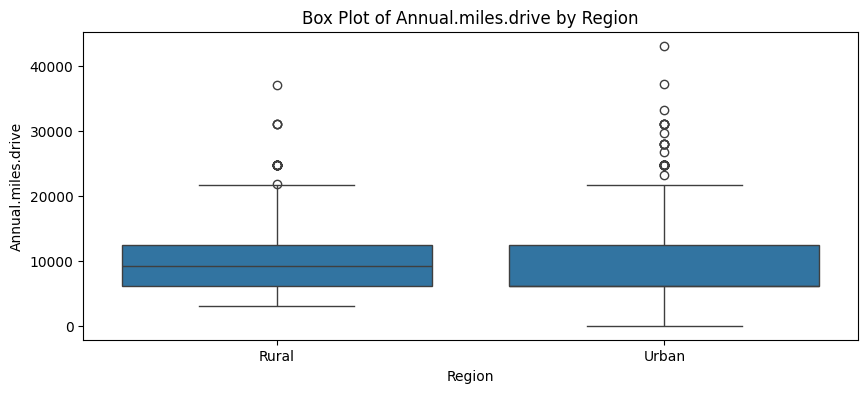

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Categorical columns
categorical_columns = ['Insured.sex', 'Marital', 'Car.use', 'Region']

# Subsample the data if necessary (e.g., 10% of the data)
sample_size = int(len(data) * 0.1)
data_sample = data.sample(n=sample_size, random_state=42)

# Plot histograms for numerical columns
for column in numerical_columns[:5]:  # Limit to first 5 numerical columns
    plt.figure(figsize=(10, 4))
    sns.histplot(data_sample[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Plot box plots for numerical columns
for column in numerical_columns[:5]:  # Limit to first 5 numerical columns
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data_sample[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

# Plot bar plots for categorical columns
for column in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=data_sample[column], order=data_sample[column].value_counts().index)
    plt.title(f'Bar Plot of {column}')
    plt.xlabel('Frequency')
    plt.ylabel(column)
    plt.show()

# Plot box plots for numerical columns grouped by categorical columns
for num_col in numerical_columns[:5]:  # Limit to first 5 numerical columns
    for cat_col in categorical_columns:
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=data_sample[cat_col], y=data_sample[num_col])
        plt.title(f'Box Plot of {num_col} by {cat_col}')
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.show()

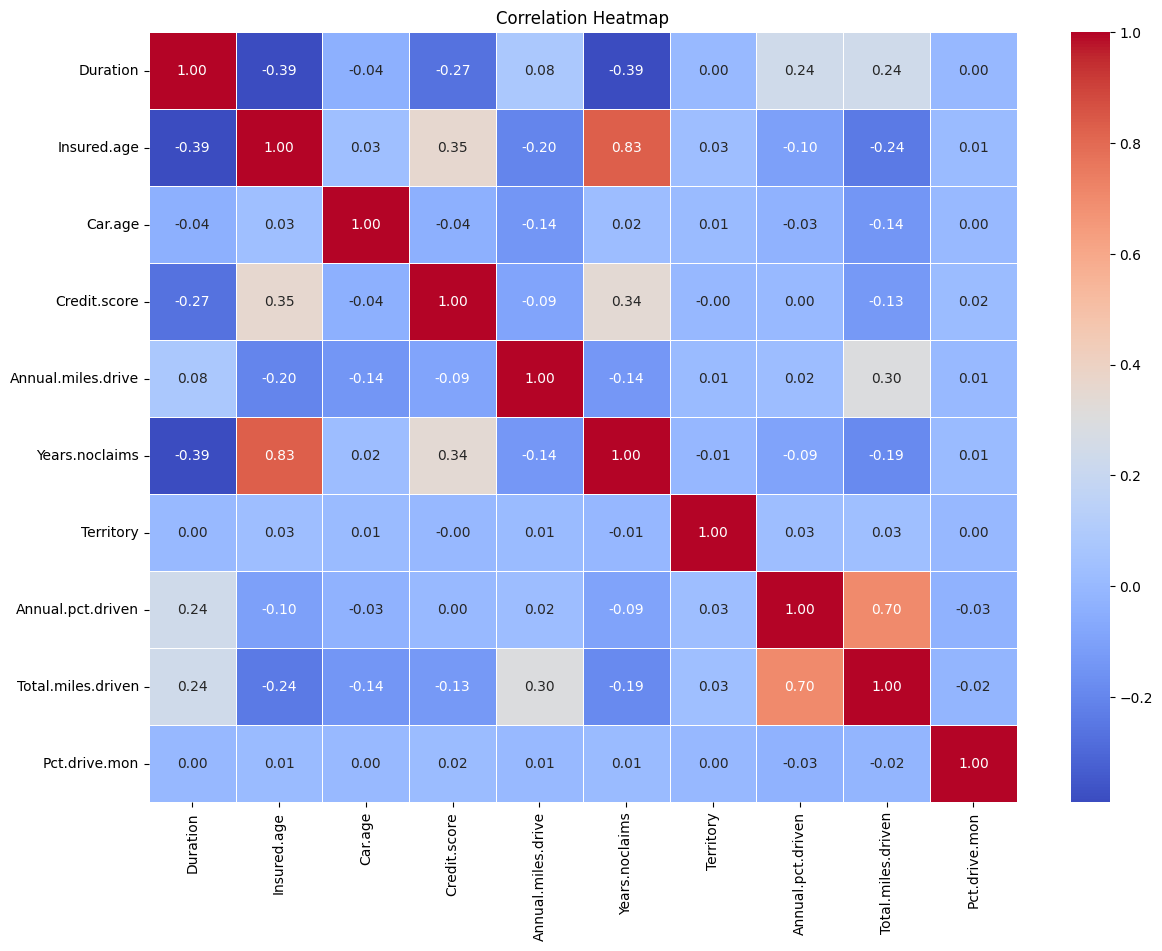

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Select a subset of numerical columns for the heatmap (e.g., first 10 columns)
subset_columns = numerical_columns[:10]

# Compute the correlation matrix for the subset
correlation_matrix = data[subset_columns].corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Develop model


In [ ]:
# Create Random Forest classifier with balanced class weights
rf_classifier = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42, n_jobs=-1)


In [ ]:
# Create the full pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', rf_classifier)
])

In [ ]:
# Fit the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Duration', 'Insured.age', 'Car.age', 'Credit.score',
       'Annual.miles.drive', 'Years.noclaims', 'Territory',
       'Annual.pct.driven', 'Total.miles.driven', 'Pct.drive.mon',
       'Pct.drive.tue', 'Pct.drive.wed', 'Pct.drive.thr', 'Pct.drive.fri',
       'Pct.drive.sat', 'Pct.drive.sun', 'P...
       'Left.turn.intensity12', 'Right.turn.intensity08',
       'Right.turn.intensity09', 'Right.turn.intensity10',
       'Right.turn.intensity11', 'Right.turn.intensity12'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Insured.sex', 'Marital',
                                                   'Car.use', 'Region'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', n_jobs=-1,
                                        random_state=42))])

In [ ]:
# Make predictions
y_pred = pipeline.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     19130
           1       0.97      0.26      0.41       870

    accuracy                           0.97     20000
   macro avg       0.97      0.63      0.70     20000
weighted avg       0.97      0.97      0.96     20000



In [ ]:
# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))


[[19122     8]
 [  641   229]]


In [ ]:

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")


Cross-validation scores: [0.968   0.9677  0.96725 0.96695 0.9692 ]
Mean CV score: 0.968 (+/- 0.002)


In [ ]:
# Feature importance
feature_importance = pipeline.named_steps['classifier'].feature_importances_
feature_names = (preprocessor.named_transformers_['num'].get_feature_names_out().tolist() +
                 preprocessor.named_transformers_['cat'].get_feature_names_out().tolist())

In [ ]:
# Sort feature importances in descending order
indices = np.argsort(feature_importance)[::-1]

# Print the top 20 feature ranking
print("\nTop 20 Feature ranking:")
for f in range(min(20, len(feature_names))):
    print("%d. %s (%f)" % (f + 1, feature_names[indices[f]], feature_importance[indices[f]]))


Top 20 Feature ranking:
1. Total.miles.driven (0.103526)
2. Annual.pct.driven (0.092099)
3. Duration (0.033678)
4. Credit.score (0.032826)
5. Pct.drive.2hrs (0.030017)
6. Avgdays.week (0.030016)
7. Pct.drive.thr (0.028129)
8. Pct.drive.rush am (0.027172)
9. Pct.drive.rush pm (0.024612)
10. Pct.drive.wed (0.024558)
11. Pct.drive.mon (0.024377)
12. Pct.drive.tue (0.023702)
13. Pct.drive.fri (0.023537)
14. Brake.06miles (0.022965)
15. Pct.drive.sat (0.022950)
16. Pct.drive.sun (0.022392)
17. Car.age (0.021313)
18. Accel.06miles (0.020572)
19. Years.noclaims (0.020419)
20. Left.turn.intensity09 (0.020307)


In [ ]:
!pip install pytorch_tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

In [ ]:
# Select top 20 features based on the provided ranking
top_features = [
    'Total.miles.driven', 'Annual.pct.driven', 'Duration', 'Credit.score',
    'Pct.drive.2hrs', 'Avgdays.week', 'Pct.drive.thr', 'Pct.drive.rush am',
    'Pct.drive.rush pm', 'Pct.drive.wed', 'Pct.drive.mon', 'Pct.drive.tue',
    'Pct.drive.fri', 'Brake.06miles', 'Pct.drive.sat', 'Pct.drive.sun',
    'Car.age', 'Accel.06miles', 'Years.noclaims', 'Left.turn.intensity09'
]

In [ ]:
# Prepare the data
X = data[top_features]
y = (data['NB_Claim'] > 0).astype(int)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.LongTensor(y_train.values)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.LongTensor(y_test.values)

In [ ]:
# Initialize and train TabNet
tabnet_model = TabNetClassifier(
    n_d=8, n_a=8, n_steps=3,
    gamma=1.3, n_independent=2, n_shared=2,
    cat_idxs=[], cat_dims=[],
    cat_emb_dim=1, optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    mask_type='entmax',
    lambda_sparse=1e-3, momentum=0.3, clip_value=2.,
    device_name='auto'
)

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


In [ ]:
tabnet_model.fit(
    X_train_tensor.numpy(), y_train_tensor.numpy(),
    eval_set=[(X_test_tensor.numpy(), y_test_tensor.numpy())],
    max_epochs=100,
    patience=10,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

epoch 0  | loss: 0.18404 | val_0_auc: 0.77508 |  0:00:04s
epoch 1  | loss: 0.15517 | val_0_auc: 0.78477 |  0:00:08s
epoch 2  | loss: 0.15385 | val_0_auc: 0.78575 |  0:00:13s
epoch 3  | loss: 0.15333 | val_0_auc: 0.78692 |  0:00:17s
epoch 4  | loss: 0.15285 | val_0_auc: 0.7868  |  0:00:21s
epoch 5  | loss: 0.15216 | val_0_auc: 0.79419 |  0:00:26s
epoch 6  | loss: 0.15212 | val_0_auc: 0.79033 |  0:00:31s
epoch 7  | loss: 0.15163 | val_0_auc: 0.7905  |  0:00:35s
epoch 8  | loss: 0.15166 | val_0_auc: 0.79377 |  0:00:40s
epoch 9  | loss: 0.15105 | val_0_auc: 0.79186 |  0:00:44s
epoch 10 | loss: 0.15111 | val_0_auc: 0.78904 |  0:00:48s
epoch 11 | loss: 0.15066 | val_0_auc: 0.79639 |  0:00:53s
epoch 12 | loss: 0.1495  | val_0_auc: 0.79603 |  0:00:58s
epoch 13 | loss: 0.14988 | val_0_auc: 0.79625 |  0:01:02s
epoch 14 | loss: 0.14894 | val_0_auc: 0.80203 |  0:01:06s
epoch 15 | loss: 0.14905 | val_0_auc: 0.79634 |  0:01:11s
epoch 16 | loss: 0.15076 | val_0_auc: 0.79501 |  0:01:15s
epoch 17 | los

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
# Automatically detect device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#The TabNetClassifier does not have a to() method, instead it sets the device during initialization
#Remove or comment out the following line:
#tabnet_model.to(device)

# Instead, ensure you specified the correct device when you initialized the model
#If you are still encountering issues and your device is set to 'auto', you can set it using the device param
#tabnet_model = TabNetClassifier(device_name=device) # Replace device with 'cuda' or 'cpu' as needed

# Convert data to PyTorch tensors and move to the same device as the model
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)

# Extract learned features using the model's forward function to get embeddings
with torch.no_grad():
    # Make sure network method takes device into account
    # Assuming the first element of the tuple is the desired output
    output = tabnet_model.network(X_train_tensor.to(tabnet_model.device))
    train_features = output[0].cpu().numpy()  # Access the first element and move to CPU for numpy

    output = tabnet_model.network(X_test_tensor.to(tabnet_model.device))
    test_features = output[0].cpu().numpy() # Access the first element and move to CPU for numpy


# Train SVM on the extracted features
svm_model = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)
svm_model.fit(train_features, y_train)

# Make predictions
y_pred = svm_model.predict(test_features)
y_pred_proba = svm_model.predict_proba(test_features)[:, 1]

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC AUC Score: {roc_auc:.3f}")

# Feature importance from TabNet
feat_importances = tabnet_model.feature_importances_
feat_importance_dict = dict(zip(top_features, feat_importances))
sorted_feat_importances = sorted(feat_importance_dict.items(), key=lambda x: x[1], reverse=True)

print("\nTabNet Feature Importances:")
for feat, importance in sorted_feat_importances:
    print(f"{feat}: {importance:.6f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.70      0.82     19146
           1       0.10      0.78      0.18       854

    accuracy                           0.70     20000
   macro avg       0.54      0.74      0.50     20000
weighted avg       0.95      0.70      0.79     20000


Confusion Matrix:
[[13362  5784]
 [  187   667]]

ROC AUC Score: 0.808

TabNet Feature Importances:
Duration: 0.285232
Total.miles.driven: 0.184323
Avgdays.week: 0.164837
Annual.pct.driven: 0.113711
Brake.06miles: 0.065162
Pct.drive.sat: 0.038803
Years.noclaims: 0.033412
Credit.score: 0.031820
Pct.drive.2hrs: 0.023103
Pct.drive.sun: 0.021995
Pct.drive.tue: 0.014535
Pct.drive.rush am: 0.013778
Car.age: 0.006937
Pct.drive.mon: 0.002280
Accel.06miles: 0.000035
Pct.drive.rush pm: 0.000033
Pct.drive.thr: 0.000003
Pct.drive.fri: 0.000001
Pct.drive.wed: 0.000001
Left.turn.intensity09: 0.000000
